In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("cardekho_data.csv")

In [3]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [4]:
df.head() 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
df["Owner"].unique()

array([0, 1, 3], dtype=int64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
df.isna()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [12]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().sum()

0

In [23]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

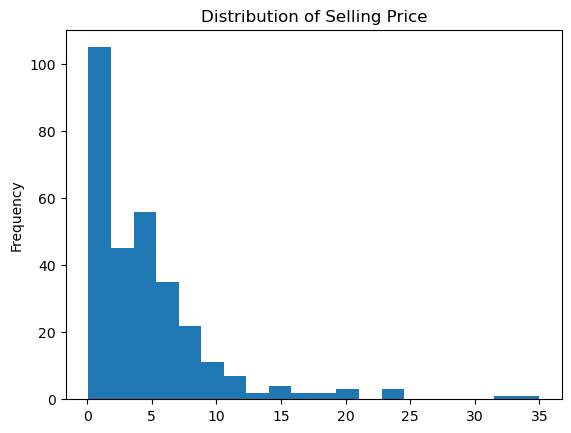

In [24]:
df["Selling_Price"].plot(kind="hist",bins=20,title="Distribution of Selling Price")
plt.show()

In [25]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
fuel_type_avg_price = df.groupby('Fuel_Type')['Selling_Price'].mean()
fuel_type_avg_price

Fuel_Type
CNG        3.100000
Diesel    10.102759
Petrol     3.264184
Name: Selling_Price, dtype: float64

In [30]:
fuel_type_avg_price.sort_values(ascending=False).head(1)

Fuel_Type
Diesel    10.102759
Name: Selling_Price, dtype: float64

In [31]:
fuel_type_avg_price.std()

3.9964919239206234

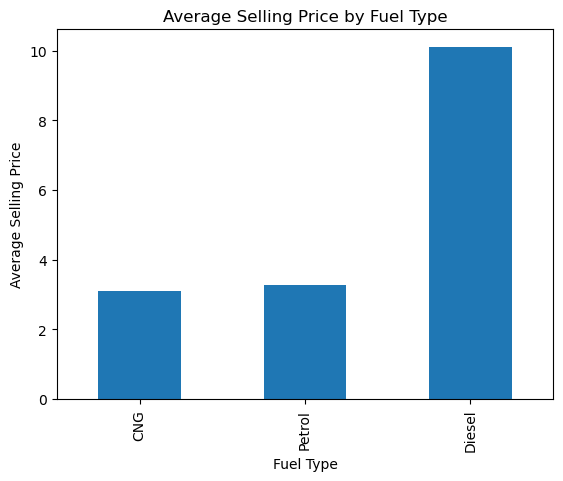

In [35]:
fuel_type_avg_price.sort_values(ascending=True).plot(kind='bar', title="Average Selling Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Selling Price")
plt.show()

In [36]:
transmission_counts=df["Transmission"].value_counts()

In [37]:
transmission_counts

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

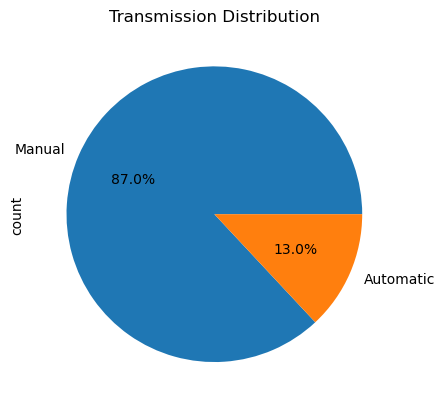

In [ ]:
transmission_counts.plot(kind='pie', autopct='%1.1f%%', title='Transmission Distribution')
plt.ylabel('')
plt.show()

In [46]:
seller_type_total_present_price = df.groupby("Seller_Type")["Present_Price"].sum()

In [47]:
seller_type_total_present_price

Seller_Type
Dealer        2081.43
Individual     173.34
Name: Present_Price, dtype: float64

In [53]:
yearly_avg_kms_driven=df.groupby("Year")["Kms_Driven"].mean()

In [55]:
yearly_avg_kms_driven.sort_values(ascending=False)

Year
2004    135154.000000
2008    112128.571429
2005    104294.000000
2003     94500.000000
2006     87422.250000
2009     67820.500000
2010     60014.066667
2007     51000.000000
2012     43798.217391
2013     41534.333333
2011     40327.368421
2014     38080.315789
2015     31977.683333
2016     17885.040816
2017     10419.800000
2018      2071.000000
Name: Kms_Driven, dtype: float64

In [58]:
fuel_trans_max_selling_price=df.groupby(["Fuel_Type","Transmission"])["Selling_Price"].max()

In [60]:
fuel_trans_max_selling_price.reset_index()

,Fuel_Type,Transmission,Selling_Price
0,CNG,Manual,3.25
1,Diesel,Automatic,33.00
2,Diesel,Manual,35.00
3,Petrol,Automatic,19.75
4,Petrol,Manual,17.00


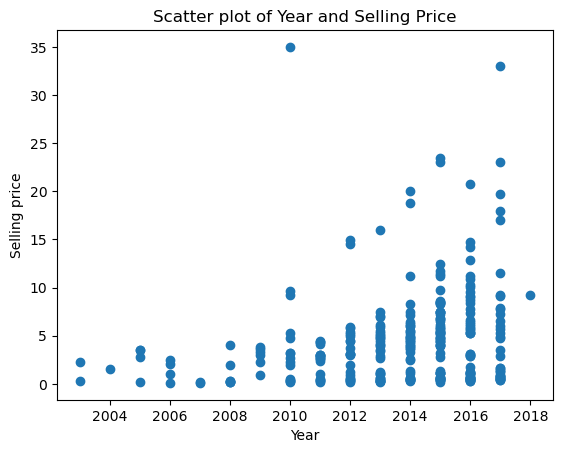

In [62]:
plt.scatter(df["Year"],df["Selling_Price"])
plt.title("Scatter plot of Year and Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling price")
plt.show()

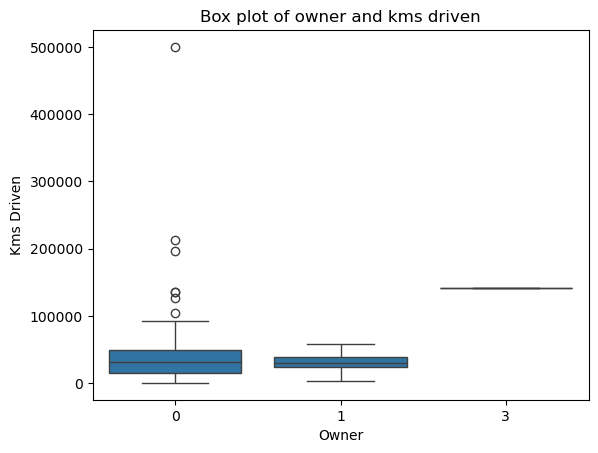

In [64]:
sns.boxplot(x="Owner",y="Kms_Driven",data=df)
plt.title("Box plot of owner and kms driven")
plt.xlabel('Owner')
plt.ylabel('Kms Driven')
plt.show()

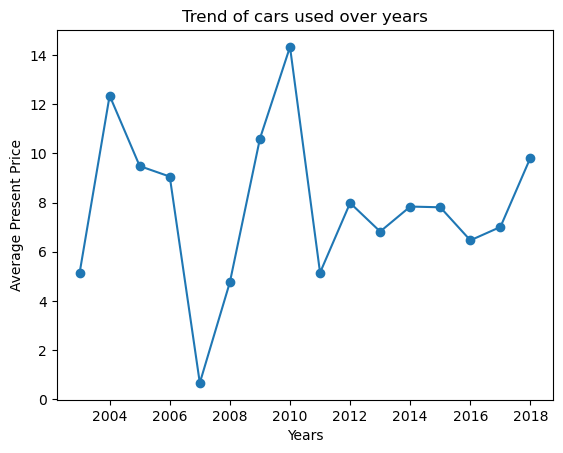

In [65]:
plt.plot(df.groupby("Year")["Present_Price"].mean(),marker="o")
plt.title("Trend of cars used over years")
plt.xlabel("Years")
plt.ylabel("Average Present Price")
plt.show()

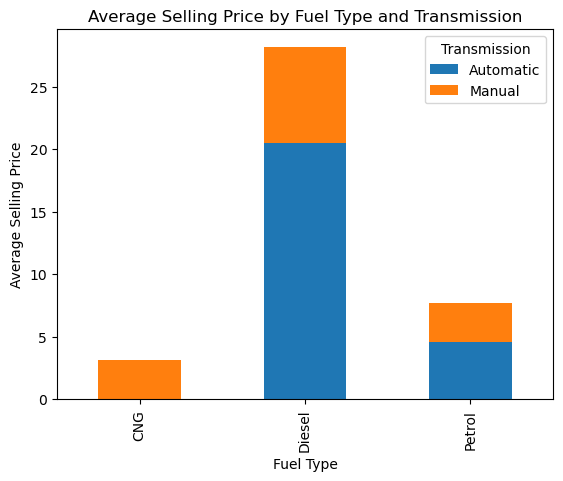

In [68]:
df.groupby(["Fuel_Type", "Transmission"])["Selling_Price"].mean().unstack().plot(kind="bar",stacked=True)
plt.title("Average Selling Price by Fuel Type and Transmission")
plt.xlabel("Fuel Type")
plt.ylabel("Average Selling Price")
plt.show()

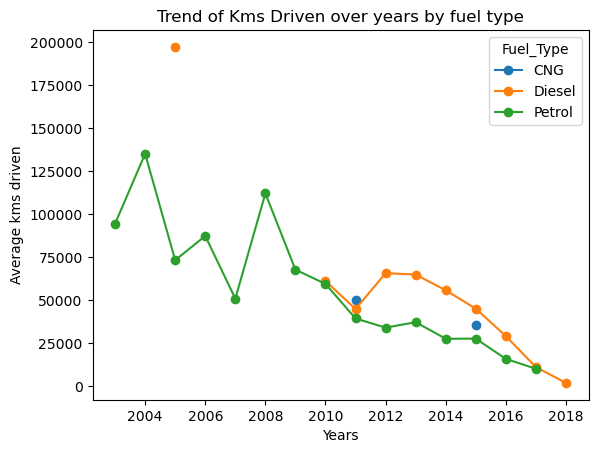

In [70]:
df.groupby(["Year", "Fuel_Type"])["Kms_Driven"].mean().unstack().plot(kind="line", marker="o")
plt.title("Trend of Kms Driven over years by fuel type")
plt.xlabel("Years")
plt.ylabel("Average kms driven")
plt.show() 

In [71]:
df.groupby(["Year", "Fuel_Type"])["Kms_Driven"].mean().unstack()

Fuel_Type,CNG,Diesel,Petrol
Year,,,
2003,NaN,NaN,94500.000000
2004,NaN,NaN,135154.000000
2005,NaN,197176.000000,73333.333333
2006,NaN,NaN,87422.250000
2007,NaN,NaN,51000.000000
2008,NaN,NaN,112128.571429
2009,NaN,NaN,67820.500000
2010,NaN,61256.000000,59562.454545
2011,49998.0,45000.000000,39483.647059


In [72]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [73]:
y=df["Selling_Price"]

In [79]:
X=df[["Year","Kms_Driven","Fuel_Type","Transmission","Owner"]]

In [80]:
X

,Year,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,27000,Petrol,Manual,0
1,2013,43000,Diesel,Manual,0
2,2017,6900,Petrol,Manual,0
3,2011,5200,Petrol,Manual,0
4,2014,42450,Diesel,Manual,0
...,...,...,...,...,...
296,2016,33988,Diesel,Manual,0
297,2015,60000,Petrol,Manual,0
298,2009,87934,Petrol,Manual,0
299,2017,9000,Diesel,Manual,0


In [78]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [81]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()


In [82]:
X["Fuel_Type"]=labelencoder.fit_transform(X["Fuel_Type"])
X["Transmission"]=labelencoder.fit_transform(X["Transmission"])

C:\Users\kvr19\AppData\Local\Temp\ipykernel_19180\1548648211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Fuel_Type"]=labelencoder.fit_transform(X["Fuel_Type"])
C:\Users\kvr19\AppData\Local\Temp\ipykernel_19180\1548648211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Transmission"]=labelencoder.fit_transform(X["Transmission"])


In [83]:
X

,Year,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,27000,2,1,0
1,2013,43000,1,1,0
2,2017,6900,2,1,0
3,2011,5200,2,1,0
4,2014,42450,1,1,0
...,...,...,...,...,...
296,2016,33988,1,1,0
297,2015,60000,2,1,0
298,2009,87934,2,1,0
299,2017,9000,1,1,0


In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_Train=scaler.fit_transform(X_train)
scaled_X_Test=scaler.transform(X_test)

In [87]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 
import numpy as np

In [88]:
def modelresults(prediction):
    print("Mean absolute error is{}".format(mean_absolute_error(y_test,predictions)))
    print("Root mean squared error is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lr = LinearRegression()

In [91]:
lr.fit(scaled_X_Train,y_train)

LinearRegression()

In [98]:
predslr = lr.predict(scaled_X_Test)

In [100]:
def modelresults(prediction):
    print("Mean absolute error is {}".format(mean_absolute_error(y_test, prediction)))
    print("Root mean squared error is {}".format(np.sqrt(mean_squared_error(y_test, prediction))))


In [101]:
modelresults(predslr)

Mean absolute error is 2.9716521228253154
Root mean squared error is 3.5379500172222724


In [103]:
from sklearn.svm import SVR

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
svrmodel = SVR()

In [106]:
param_gridsvr={"C": [0.1,0.5],"kernel":["linear","rbf","poly"],"degree":[3,4,5]}

In [107]:
gridsvr=GridSearchCV(svrmodel, param_gridsvr)

In [108]:
gridsvr.fit(scaled_X_Train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'rbf', 'poly']})

In [109]:
gridsvr.best_params_

{'C': 0.1, 'degree': 3, 'kernel': 'linear'}

In [110]:
predsgridsvr= gridsvr.predict(scaled_X_Test)

In [111]:
modelresults(predsgridsvr)

Mean absolute error is 2.8956196789157786
Root mean squared error is 3.8540160560117234


In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
rfrmodel=RandomForestRegressor()
param_gridrfr={"max_depth":[5,10],"n_estimators":[2,5,8]}
gridfr= GridSearchCV(rfrmodel,param_gridrfr)

In [115]:
gridfr.fit(scaled_X_Train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'n_estimators': [2, 5, 8]})

In [117]:
gridfr.best_params_

{'max_depth': 5, 'n_estimators': 5}

In [118]:
predsgridfr=gridfr.predict(scaled_X_Test)

In [119]:
modelresults(predsgridfr)

Mean absolute error is 2.7374336310363216
Root mean squared error is 3.6914364566423297
